<!-- Commencez par charger l'ensemble de données dans un bloc-notes et prétraitez-le. -->

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import os
print(os.listdir())  # Vérifie si "US Superstore data.xls" est présent

['Exercice.ipynb', 'US Superstore data.xls']


In [23]:
!pip install xlrd


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
# Read and store content 
# of an excel file 
df = pd.read_csv ('US Superstore data.xls') 
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [40]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [41]:
# Vérifier les valeurs manquantes
print(df.isnull().sum())


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


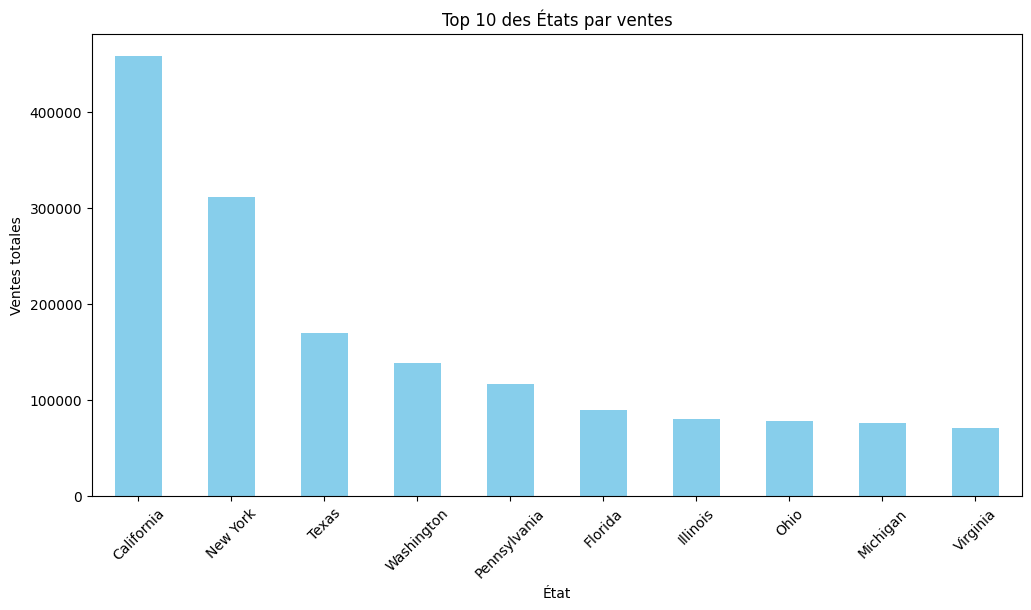

In [42]:
# Grouper les données par État et sommer les ventes
state_sales = df.groupby('State')['Sales'].sum().sort_values(ascending=False)

# Visualiser les 10 États avec le plus de ventes
plt.figure(figsize=(12, 6))
state_sales.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 des États par ventes')
plt.xlabel('État')
plt.ylabel('Ventes totales')
plt.xticks(rotation=45)
plt.show()


In [44]:
print(f'Quels États réalisent le plus de ventes ?', 'La californie est l etat qui realise le plus de ventes.')

Quels États réalisent le plus de ventes ? La californie est l etat qui realise le plus de ventes.


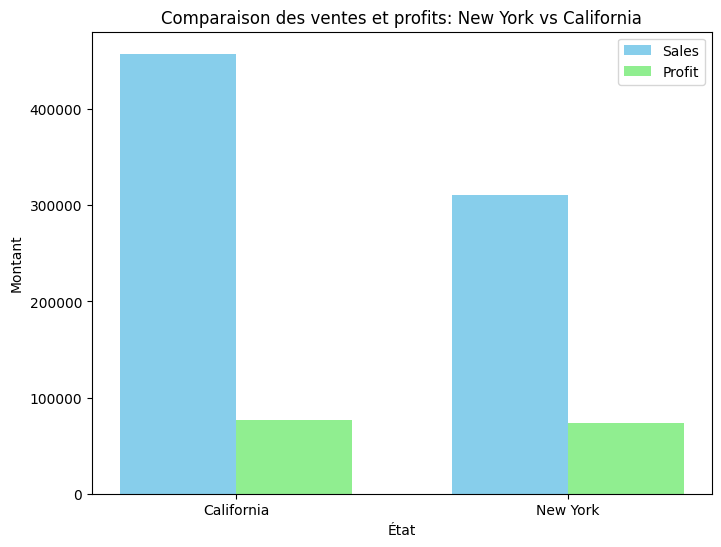

In [50]:
# Extraire les labels et valeurs
states = ny_ca_summary.index
sales_values = ny_ca_summary['Sales']
profit_values = ny_ca_summary['Profit']

x = range(len(states))
width = 0.35

plt.figure(figsize=(8, 6))
plt.bar(x, sales_values, width=width, color='skyblue', label='Sales')
plt.bar([i + width for i in x], profit_values, width=width, color='lightgreen', label='Profit')
plt.xticks([i + width/2 for i in x], states)
plt.title('Comparaison des ventes et profits: New York vs California')
plt.xlabel('État')
plt.ylabel('Montant')
plt.legend()
plt.show()


In [46]:
print('la californie fais plus de ventes que new york et à aussi plus de profit')

la californie fais plus de ventes que new york et à aussi plus de profit


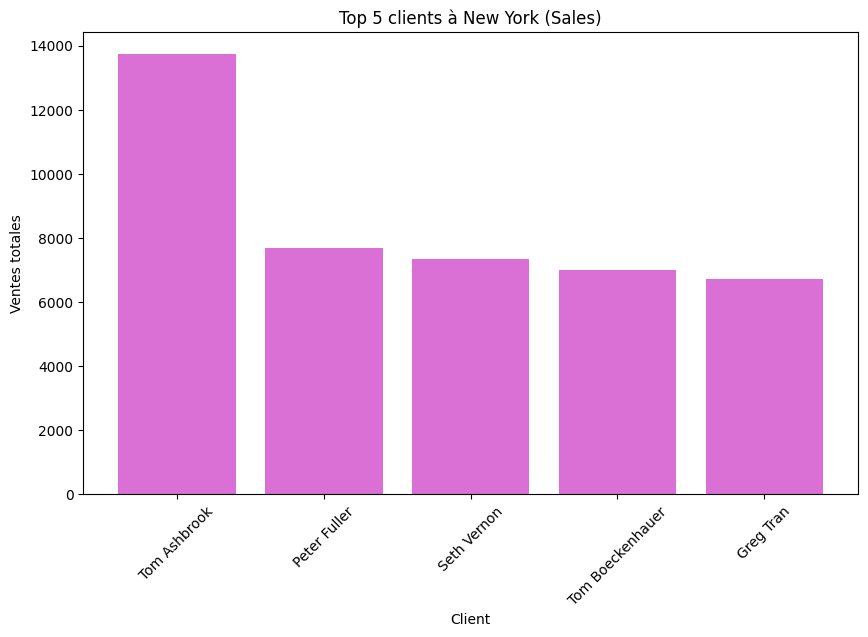

In [51]:
plt.figure(figsize=(10, 6))
plt.bar(ny_customers.head(5).index, ny_customers.head(5).values, color='orchid')
plt.title('Top 5 clients à New York (Sales)')
plt.xlabel('Client')
plt.ylabel('Ventes totales')
plt.xticks(rotation=45)
plt.show()


In [48]:
print("le client exceptionnel ici est Tom Ashbrook qui a presque le double par rapport au top 5")

le client exceptionnel ici est Tom Ashbrook qui a presque le double par rapport au top 5


State
California              76381.3871
New York                74038.5486
Washington              33402.6517
Michigan                24463.1876
Virginia                18597.9504
Indiana                 18382.9363
Georgia                 16250.0433
Kentucky                11199.6966
Minnesota               10823.1874
Delaware                 9977.3748
New Jersey               9772.9138
Wisconsin                8401.8004
Rhode Island             7285.6293
Maryland                 7031.1788
Massachusetts            6785.5016
Missouri                 6436.2105
Alabama                  5786.8253
Oklahoma                 4853.9560
Arkansas                 4008.6871
Connecticut              3511.4918
Nevada                   3316.7659
Mississippi              3172.9762
Utah                     2546.5335
Vermont                  2244.9783
Louisiana                2196.1023
Nebraska                 2037.0942
Montana                  1833.3285
South Carolina           1769.0566
New Hampshire 

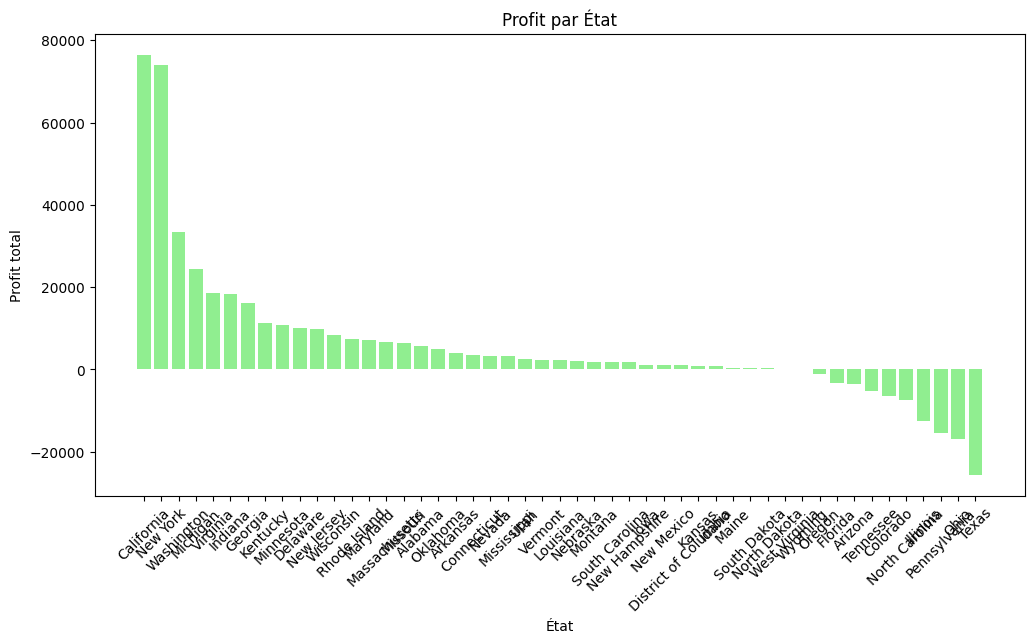

In [57]:
# Grouper par État et sommer les profits
state_profit = df.groupby('State')['Profit'].sum().sort_values(ascending=False)
print(state_profit)

plt.figure(figsize=(12, 6))
plt.bar(state_profit.index, state_profit.values, color='lightgreen')
plt.title('Profit par État')
plt.xlabel('État')
plt.ylabel('Profit total')
plt.xticks(rotation=45)
plt.show()


In [58]:
print("Le graphique montre des variations importantes de profit selon les États, certains États affichant des profits négatifs qui nécessitent une attention particulière.")

Le graphique montre des variations importantes de profit selon les États, certains États affichant des profits négatifs qui nécessitent une attention particulière.


In [59]:
# Grouper par client et sommer les profits
customer_profit = df.groupby('Customer ID')['Profit'].sum().sort_values(ascending=False)
cumulative_profit = customer_profit.cumsum()
total_profit = customer_profit.sum()
cumulative_percentage = 100 * cumulative_profit / total_profit

# Afficher les 10 premiers pour vérifier
print(cumulative_percentage.head(10))


Customer ID
TC-20980     3.135970
RB-19360     5.571783
SC-20095     7.582073
HL-15040     9.545232
AB-10105    11.446371
TA-21385    13.088773
CM-12385    14.450480
KD-16495    15.511464
AR-10540    16.518674
DR-12940    17.520457
Name: Profit, dtype: float64


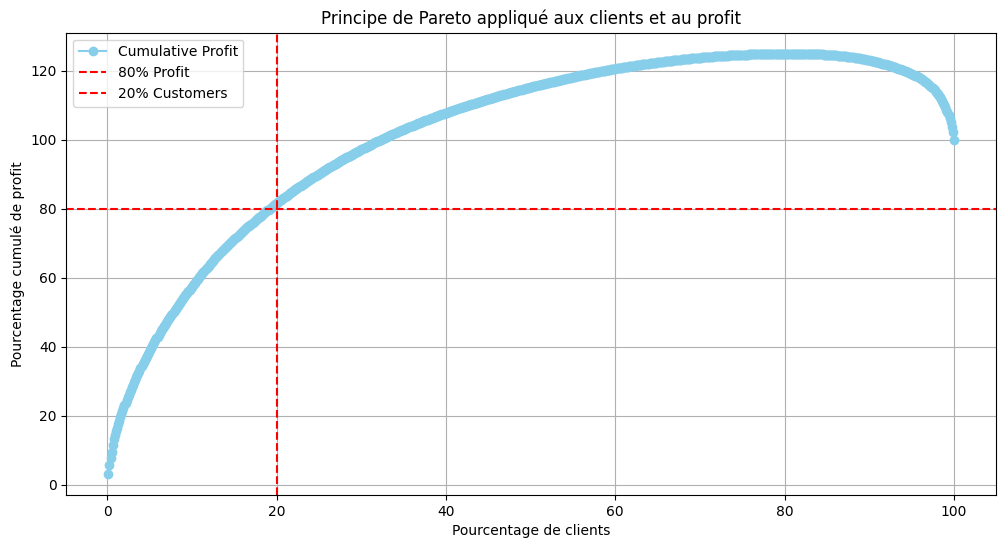

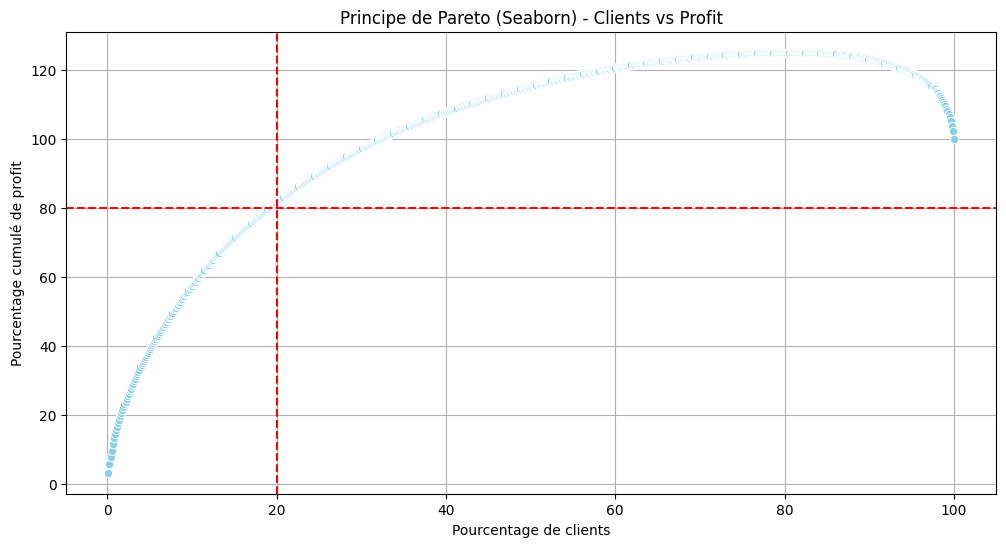

In [62]:
# Préparer les pourcentages de clients
customer_percentage = [i / len(customer_profit) * 100 for i in range(1, len(customer_profit)+1)]
import seaborn as sns

plt.figure(figsize=(12, 6))
# Utilisation de Matplotlib pour tracer la courbe cumulative
plt.plot(customer_percentage, cumulative_percentage, marker='o', color='skyblue', label='Cumulative Profit')
plt.axhline(80, color='red', linestyle='--', label='80% Profit')
plt.axvline(20, color='red', linestyle='--', label='20% Customers')
plt.title('Principe de Pareto appliqué aux clients et au profit')
plt.xlabel('Pourcentage de clients')
plt.ylabel('Pourcentage cumulé de profit')
plt.legend()
plt.grid(True)
plt.show()

# Visualisation avec Seaborn (lineplot)
plt.figure(figsize=(12, 6))
sns.lineplot(x=customer_percentage, y=cumulative_percentage, marker='o', color='skyblue')
plt.axhline(80, color='red', linestyle='--')
plt.axvline(20, color='red', linestyle='--')
plt.title('Principe de Pareto (Seaborn) - Clients vs Profit')
plt.xlabel('Pourcentage de clients')
plt.ylabel('Pourcentage cumulé de profit')
plt.grid(True)
plt.show()


In [63]:
print("« Le graphique montre que près de 20 % des clients génèrent environ 80 % du profit, confirmant l’application du principe de Pareto. »")

« Le graphique montre que près de 20 % des clients génèrent environ 80 % du profit, confirmant l’application du principe de Pareto. »


In [65]:
# Grouper par ville et sommer les ventes et profits
city_performance = df.groupby('City')[['Sales', 'Profit']].sum()

# Top 20 villes par ventes
top_20_sales_cities = city_performance.sort_values(by='Sales', ascending=False).head(20)
print("Top 20 villes par ventes:")
print(top_20_sales_cities)

# Top 20 villes par profits
top_20_profit_cities = city_performance.sort_values(by='Profit', ascending=False).head(20)
print("\nTop 20 villes par profits:")
print(top_20_profit_cities)


Top 20 villes par ventes:
                     Sales      Profit
City                                  
New York City  256368.1610  62036.9837
Los Angeles    175851.3410  30440.7579
Seattle        119540.7420  29156.0967
San Francisco  112669.0920  17507.3854
Philadelphia   109077.0130 -13837.7674
Houston         64504.7604 -10153.5485
Chicago         48539.5410  -6654.5688
San Diego       47521.0290   6377.1960
Jacksonville    44713.1830  -2323.8350
Springfield     43054.3420   6200.6974
Detroit         42446.9440  13181.7908
Columbus        38706.2430   5897.1013
Newark          28576.1190   5793.7588
Columbia        25283.3240   5606.1167
Lafayette       25036.2000  10018.3876
Jackson         24963.8580   7581.6828
San Antonio     21843.5280  -7299.0502
Burlington      21668.0820  -3622.8772
Arlington       20214.5320   4169.6969
Dallas          20131.9322  -2846.5257

Top 20 villes par profits:
                    Sales      Profit
City                                 
New York Cit

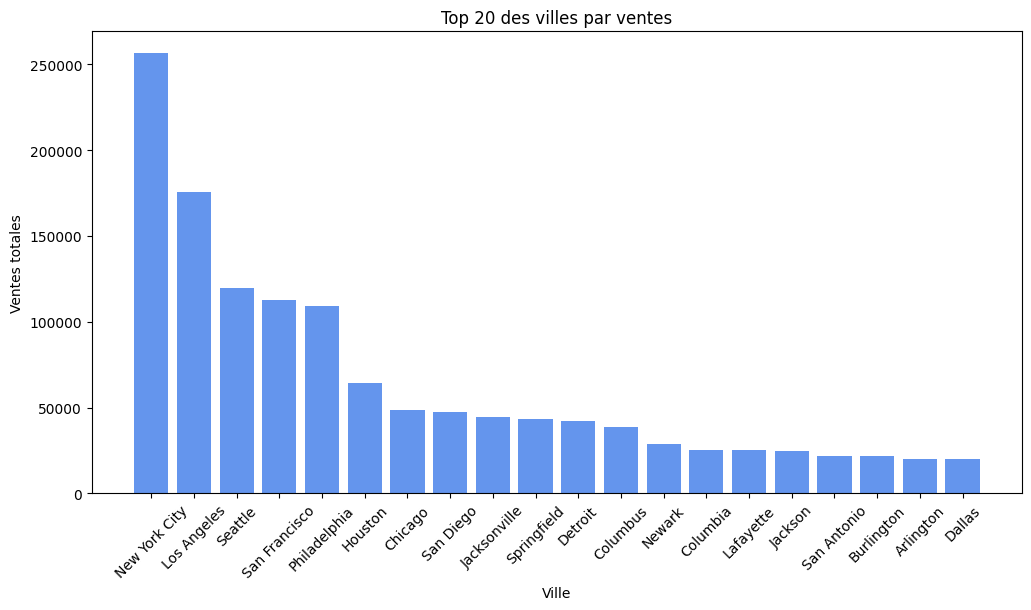

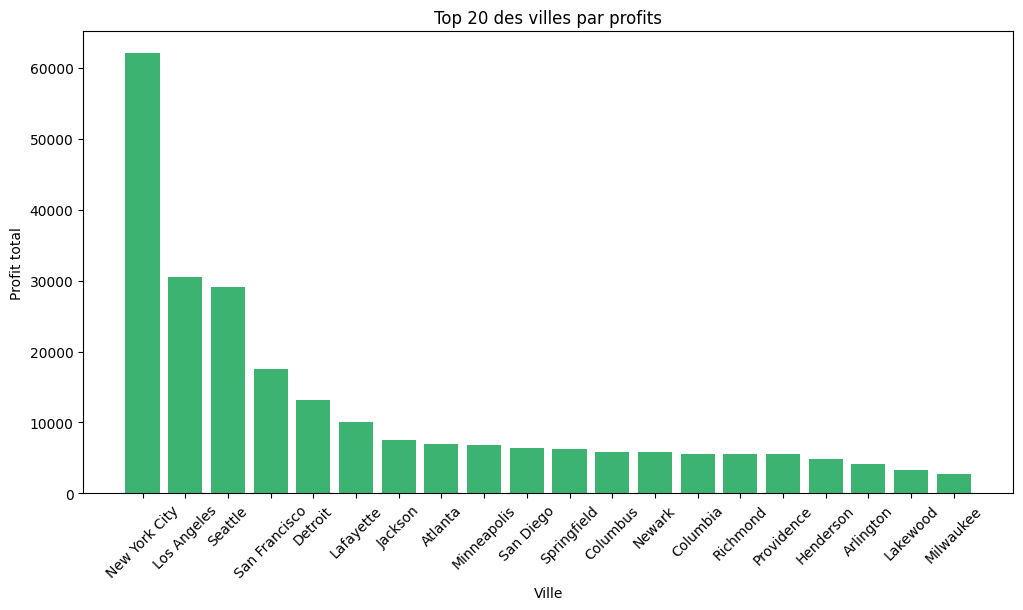

In [66]:
# Visualiser Top 20 villes par ventes
plt.figure(figsize=(12, 6))
plt.bar(top_20_sales_cities.index, top_20_sales_cities['Sales'], color='cornflowerblue')
plt.title('Top 20 des villes par ventes')
plt.xlabel('Ville')
plt.ylabel('Ventes totales')
plt.xticks(rotation=45)
plt.show()

# Visualiser Top 20 villes par profits
plt.figure(figsize=(12, 6))
plt.bar(top_20_profit_cities.index, top_20_profit_cities['Profit'], color='mediumseagreen')
plt.title('Top 20 des villes par profits')
plt.xlabel('Ville')
plt.ylabel('Profit total')
plt.xticks(rotation=45)
plt.show()


In [67]:
print(" Les graphiques montrent clairement les 20 villes avec les ventes et profits les plus élevés. Une comparaison des deux peut révéler des différences de rentabilité entre les villes. ")

 Les graphiques montrent clairement les 20 villes avec les ventes et profits les plus élevés. Une comparaison des deux peut révéler des différences de rentabilité entre les villes. 


In [69]:
# Grouper par client et sommer les ventes
customer_sales = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False)
print("Top 20 clients par ventes:")
print(customer_sales.head(20))


Top 20 clients par ventes:
Customer Name
Sean Miller           25043.050
Tamara Chand          19052.218
Raymond Buch          15117.339
Tom Ashbrook          14595.620
Adrian Barton         14473.571
Ken Lonsdale          14175.229
Sanjit Chand          14142.334
Hunter Lopez          12873.298
Sanjit Engle          12209.438
Christopher Conant    12129.072
Todd Sumrall          11891.751
Greg Tran             11820.120
Becky Martin          11789.630
Seth Vernon           11470.950
Caroline Jumper       11164.974
Clay Ludtke           10880.546
Maria Etezadi         10663.728
Karen Ferguson        10604.266
Bill Shonely          10501.653
Edward Hooks          10310.880
Name: Sales, dtype: float64


C:\Users\Amin\AppData\Local\Temp\ipykernel_5112\1471524822.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top20_customers.index, rotation=45, ha='right')


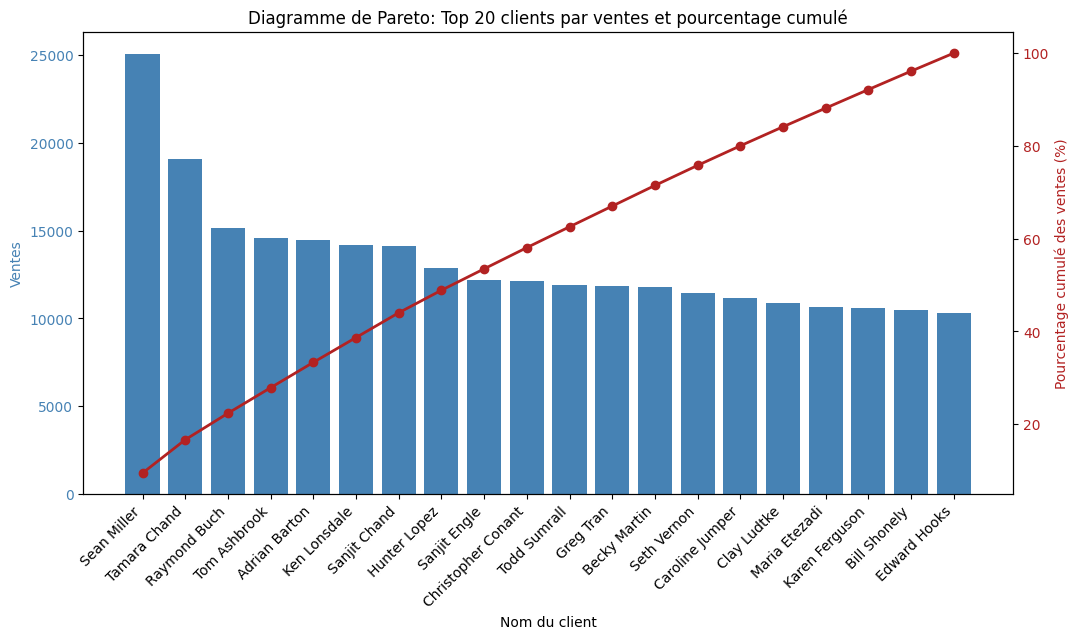

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculer les ventes par client et trier par ordre décroissant
customer_sales = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False)

# Sélectionner les 20 meilleurs clients
top20_customers = customer_sales.head(20)

# Calculer la somme cumulée des ventes pour ces 20 clients
cumulative_sales = top20_customers.cumsum()

# Calculer le pourcentage cumulé des ventes
cumulative_percentage = 100 * cumulative_sales / top20_customers.sum()

# Créer le graphique de Pareto
fig, ax1 = plt.subplots(figsize=(12, 6))

# Graphique à barres pour les ventes des 20 meilleurs clients
ax1.bar(top20_customers.index, top20_customers.values, color='steelblue')
ax1.set_xlabel('Nom du client')
ax1.set_ylabel('Ventes', color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')
ax1.set_xticklabels(top20_customers.index, rotation=45, ha='right')

# Créer un second axe pour la courbe cumulative
ax2 = ax1.twinx()
ax2.plot(top20_customers.index, cumulative_percentage, color='firebrick', marker='o', linestyle='-', linewidth=2)
ax2.set_ylabel('Pourcentage cumulé des ventes (%)', color='firebrick')
ax2.tick_params(axis='y', labelcolor='firebrick')

plt.title('Diagramme de Pareto: Top 20 clients par ventes et pourcentage cumulé')
plt.show()



In [ ]:
print("pour la strategie marketing je me concentrerai sur les New york seattle los angeles et san francisco")

In [ ]:
print("pour moi on ne peut au client mais on peut le faire pour les ventes ")